# Source Localisation Evaluation

In [4]:
# Set this to "True", if you want to export the boxplots as tikz-files.
# WARNING: Existing tikz-files might be overwritten.
EXPORT_LATEX = False

%matplotlib inline  
# For interactive inline plots, uncomment the following line
# %matplotlib notebook 

import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from mthesis.helpers import *  # all custom methods for easier data loading and manipulation are in this package

PATH_LATEX_PLOTS = '/Users/jannismainczyk/latex/plots/boxplots/'
PATH_LATEX_TABLES = '/Users/jannismainczyk/latex/data/tables/'
# Other paths might need to be adjusted in 'mthesis/helpers.py'

## All Data 

In [151]:
df = load_all_data()
dft = df

In [146]:
print("SUMMARY:")
dft = df
summary = dft.groupby('n-sources').agg({'x1':'count', 'err-mean':np.mean, 'percent-matched':np.mean}).rename(columns={'x1':'n'})
print(summary.transpose())

print_summary(dft, verbose=False)
print("OVERVIEW OF SAMPLE SIZES PER EVALUATION:")
dfp = df.pivot_table("x1", index=["n-sources"], columns=["description", "reflect-order", "T60", "em", "md", "SNR","wd","var-val","var-fixed"], aggfunc='count').transpose()
print(dfp)

# if EXPORT_LATEX:
#     summary.transpose().to_latex("".join([PATH_LATEX_TABLES, 'summary-all.tex']), column_format="rrrrrrr", bold_rows=True)

SUMMARY:
n-sources           2     3     4     5     6     7
n               10570 10520 10520 10520 10520 10470
err-mean         0.15  0.25  0.33  0.38  0.42  0.41
percent-matched  0.78  0.72  0.66  0.61  0.56  0.53
DATA FROM:  {'var-fixed', 'T60', 'worst-case', 'noise', 'reflect-order', 'em-iterations', 'wd', 'base', 'min-distance'}
n-sources           2     3     4     5     6     7
n               10570 10520 10520 10520 10520 10470
em-iterations    6.83  6.84  6.84  6.84  6.84  6.85
T60              0.34  0.34  0.34  0.34  0.34  0.34
SNR              1.27  1.28  1.28  1.28  1.28  1.28
md               0.49  0.49  0.49  0.49  0.49  0.49
reflect-order    2.15  2.17  2.17  2.17  2.17  2.18
var-fixed        0.11  0.11  0.11  0.11  0.11  0.11
var-val          0.52  0.52  0.52  0.52  0.52  0.52
err-mean         0.15  0.25  0.33  0.38  0.42  0.41
percent-matched  0.78  0.72  0.66  0.61  0.56  0.53
NOTE: Data contains range of md (['0.1', '0.3', '0.5', '1.0'], n=[500, 400, 9270, 300])
NOT

# <font color='green'>--- PRINTING RESULTS TO TIKZ AND LATEX STARTS HERE ---</font>

## Fixed EM-Iterations

In [45]:
# Manipulate Data
var = "em"
dft = df
dft = dft[dft["description"]=="em-iterations"]
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
# dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)

DATA FROM:  {'em-iterations'}
n-sources          2    3    4    5    6    7
n               1200 1200 1200 1200 1200 1200
em-iterations   6.83 6.83 6.83 6.83 6.83 6.83
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.14 0.23 0.32 0.40 0.49 0.47
percent-matched 0.78 0.72 0.68 0.62 0.56 0.53
NOTE: Data contains range of em (['1.0', '2.0', '3.0', '5.0', '10.0', '20.0'], n=200)



In [46]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=var, aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)
# if EXPORT_LATEX:
#     dfp.to_latex("".join([PATH_LATEX_TABLES, 'results-{}.tex'.format(var)]), column_format="lcccccc", bold_rows=True)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
em                                     
1          200  200  200  200  200  200
2          200  200  200  200  200  200
3          200  200  200  200  200  200
5          200  200  200  200  200  200
10         200  200  200  200  200  200
20         200  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
em                                     
1         0.19 0.37 0.48 0.50 0.65 0.60
2         0.17 0.23 0.39 0.47 0.52 0.50
3         0.14 0.22 0.29 0.43 0.46 0.44
5         0.12 0.20 0.25 0.36 0.46 0.44
10        0.13 0.20 0.25 0.30 0.39 0.43
20        0.08 0.18 0.28 0.31 0.45 0.41


In [ ]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

# if EXPORT_LATEX:
#     tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [ ]:
for measure in ['err-mean', 'percent-matched']:
    # Table
    print("\n{}:".format(measure.upper()))
    dfp = dft.pivot_table(measure, index=["n-sources"], columns=var, aggfunc='mean').transpose()
    print(dfp)

    # Boxplot
    fig = figure(figsize=(17,5)); ax  = fig.add_subplot(111)

    idx=0
    for val in dfp.index.values:
        dftt = dft[dft[var]==val]
        bp = dftt.boxplot(measure, by=["n-sources"], ax=ax, **boxplot_args)
        style_boxplot(bp, None, idx, len(dfp.index.values), measure)
        idx+=1

#     if EXPORT_LATEX:
#         tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}-{}.tex'.format(var, measure)]), strict=True, wrap=False)

## T60

In [90]:
# Manipulate Data
var = "T60"
dft = df
dft = dft[dft["reflect-order"]==-1]
# dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)

DATA FROM:  {'T60', 'reflect-order'}
n-sources          2    3    4    5    6    7
n               1000  950  950  950  950 1000
em-iterations      5    5    5    5    5    5
T60             0.45 0.43 0.43 0.43 0.43 0.40
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order     -1   -1   -1   -1   -1   -1
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.23 0.36 0.49 0.57 0.62 0.56
percent-matched 0.74 0.66 0.60 0.54 0.50 0.49
NOTE: Data contains range of T60 (['0.0', '0.3', '0.6', '0.9'], n=[250, 250, 250, 200])
WARN: Unbalanced n_sources for 'T60'. There may be a trial running at the moment!
n-sources    2    3    4    5    6    7
T60                                    
0          250  250  250  250  250  300
0.30       250  250  250  250  250  250
0.60       250  250  250  250  250  250
0.90       250  200  200  200  200  200



In [91]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)
if EXPORT_LATEX:
    dfp.to_latex("".join([PATH_LATEX_TABLES, 'results-{}.tex'.format(var)]), column_format="lrrrrrr", bold_rows=True)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
T60                                    
0          250  250  250  250  250  300
0.30       250  250  250  250  250  250
0.60       250  250  250  250  250  250
0.90       250  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
T60                                    
0         0.02 0.06 0.11 0.22 0.26 0.31
0.30      0.12 0.21 0.31 0.39 0.47 0.44
0.60      0.23 0.50 0.70 0.80 0.83 0.75
0.90      0.55 0.74 0.93 0.93 0.99 0.88


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


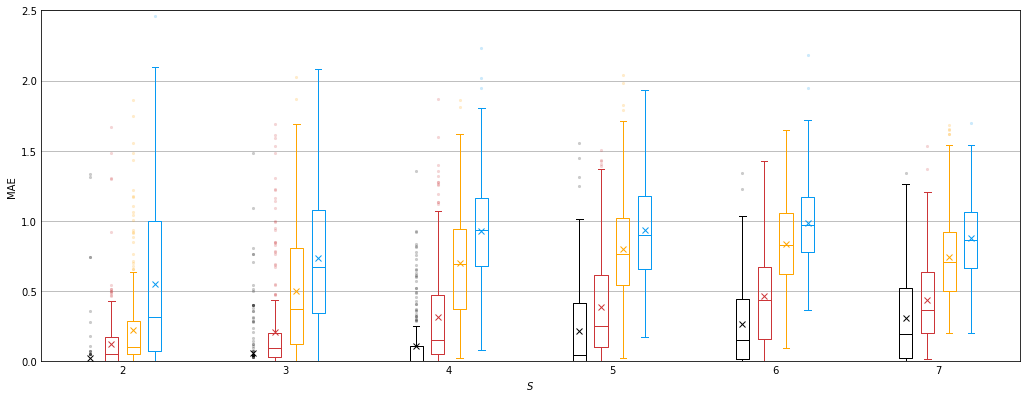

In [92]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Min-Distance 

In [50]:
var="md"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
# dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]=="min-distance"]
print_summary(dft)

DATA FROM:  {'min-distance'}
n-sources          2    3    4    5    6    7
n                800  800  800  800  800  800
em-iterations      5    5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.48 0.48 0.48 0.48 0.48 0.48
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.17 0.29 0.33 0.39 0.36 0.36
percent-matched 0.77 0.69 0.64 0.58 0.56 0.51
NOTE: Data contains range of md (['0.1', '0.3', '0.5', '1.0'], n=200)



In [51]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["md"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["md"], aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
md                                     
0.10       200  200  200  200  200  200
0.30       200  200  200  200  200  200
0.50       200  200  200  200  200  200
1          200  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
md                                     
0.10      0.24 0.34 0.39 0.49 0.37 0.36
0.30      0.20 0.38 0.37 0.37 0.41 0.36
0.50      0.12 0.18 0.21 0.26 0.28 0.30
1         0.11 0.28 0.36 0.44 0.40 0.42


In [ ]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Reflect Order

In [152]:
# Manipulate Data
var = "reflect-order"
dft = df
# dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.6]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
# print_summary(dft)

In [153]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["reflect-order"], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=["reflect-order"], aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources        2    3    4    5    6    7
reflect-order                              
-1             250  250  250  250  250  250
1              250  250  250  250  250  250
3              250  250  250  250  250  250

MEAN ERROR:
n-sources        2    3    4    5    6    7
reflect-order                              
-1            0.23 0.50 0.70 0.80 0.83 0.75
1             0.12 0.17 0.25 0.35 0.43 0.43
3             0.15 0.29 0.40 0.51 0.60 0.56


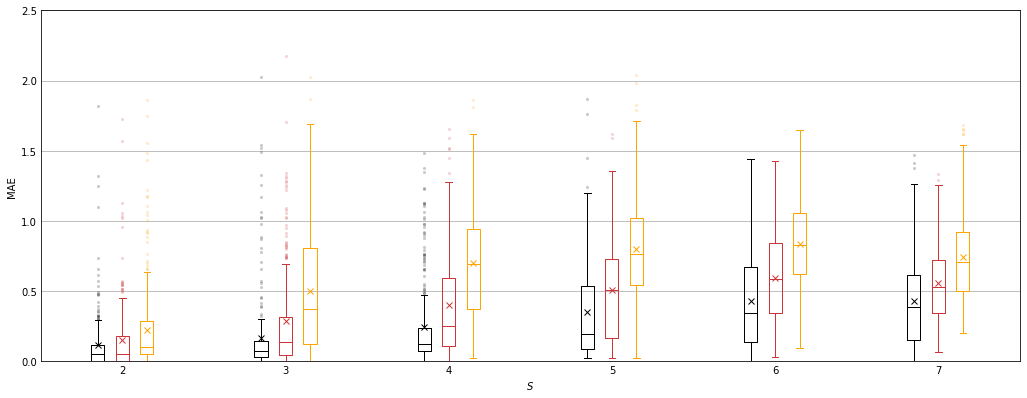

In [154]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in [1,3,-1]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

## SNR

In [155]:
var = "SNR"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
# dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]=="noise"]
print_summary(dft)

DATA FROM:  {'noise'}
n-sources          2    3    4    5    6    7
n               1000 1000 1000 1000 1000 1000
em-iterations      5    5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR               12   12   12   12   12   12
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.15 0.27 0.38 0.42 0.44 0.40
percent-matched 0.74 0.66 0.60 0.55 0.50 0.47
NOTE: Data contains range of SNR (['0.0', '5.0', '10.0', '15.0', '30.0'], n=200)



In [156]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
SNR                                    
0          200  200  200  200  200  200
5          200  200  200  200  200  200
10         200  200  200  200  200  200
15         200  200  200  200  200  200
30         200  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
SNR                                    
0         0.10 0.19 0.30 0.33 0.36 0.31
5         0.17 0.42 0.56 0.58 0.56 0.52
10        0.17 0.34 0.45 0.45 0.47 0.46
15        0.16 0.25 0.36 0.44 0.46 0.42
30        0.13 0.16 0.24 0.32 0.36 0.32


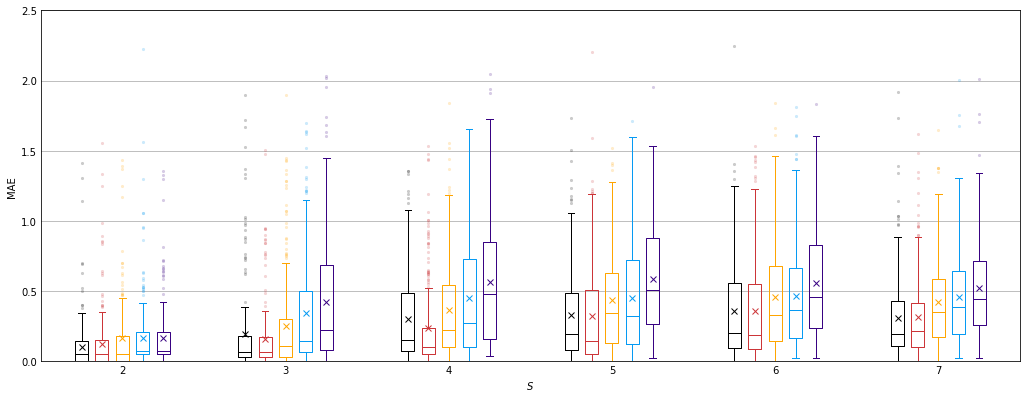

In [157]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in [0,30,15,10,5]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Wall distance

In [158]:
var = "wd"
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
# dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]!="noise"]
dft = dft[dft["description"]!="T60"]
dft = dft[dft["description"]!="min-distance"]
print_summary(dft)
# dfp = df.pivot_table("err-mean", index=["description", "wd"], columns="n-sources", aggfunc='mean').transpose()
# dfp.boxplot(column=("n-sources"))

DATA FROM:  {'em-iterations'}
n-sources          2    3    4    5    6    7
n                600  600  600  600  600  600
em-iterations      5    5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10 0.10
err-mean        0.10 0.19 0.23 0.34 0.40 0.38
percent-matched 0.84 0.76 0.73 0.66 0.62 0.57
NOTE: Data contains range of wd (['1.2', '1.3', '1.5'], n=200)



In [159]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6    7
wd                                     
1.20       200  200  200  200  200  200
1.30       200  200  200  200  200  200
1.50       200  200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6    7
wd                                     
1.20      0.12 0.20 0.25 0.36 0.46 0.44
1.30      0.08 0.22 0.26 0.32 0.42 0.37
1.50      0.09 0.13 0.18 0.32 0.34 0.35


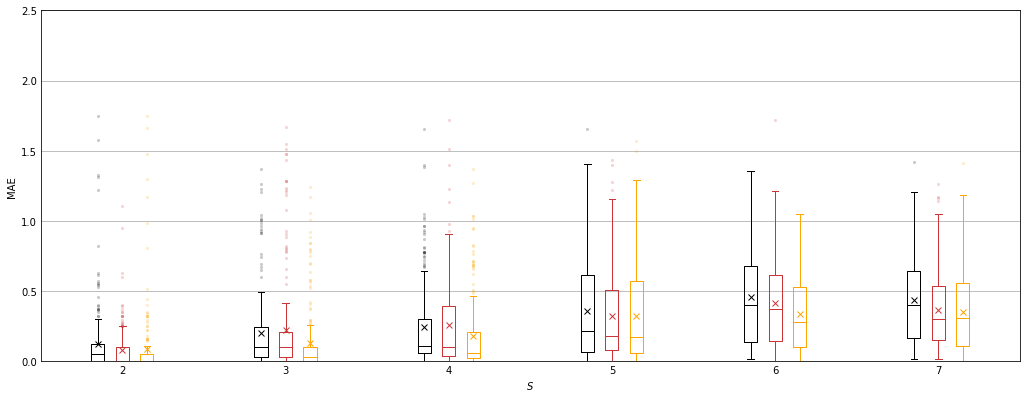

In [160]:
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in dfp.index.values:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(dfp.index.values))
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

# Ideal vs. Adverse Scenario

In [147]:
var = "wd"
dfts = []

print("BEST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==0]
dft = dft[dft["T60"]==0.0]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.5]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("BASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
dft = dft[dft["description"]=="noise"]
print_summary(dft)
dfts.append(dft)

print("WORST CASE SCENARIO:")
# Manipulate Data
dft = df
dft = dft[dft["reflect-order"]==-1]
dft = dft[dft["T60"]==0.9]
dft = dft[dft["em"]==5]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==5]
dft = dft[dft["var-fixed"]==0]
dft = dft[dft["var-val"]==0.1]
print_summary(dft)
dfts.append(dft)

print("GUESSING:")
dft = matlab2pandas(dirname='_guessing', save_to=path.join(PATH_ROOT, '_guessing'), summary=True)
dft = dft[dft["n-sources"]<=7]
dfts.append(dft)

BEST CASE SCENARIO:
DATA FROM:  {'wd'}
n-sources              2    3    4    5    6    7
n                    200  200  200  200  200  200
em-iterations          5    5    5    5    5    5
T60                    0    0    0    0    0    0
SNR                    0    0    0    0    0    0
md                  0.50 0.50 0.50 0.50 0.50 0.50
reflect-order          0    0    0    0    0    0
var-fixed              0    0    0    0    0    0
var-val             0.10 0.10 0.10 0.10 0.10 0.10
err-mean        1.12e-03 0.06 0.11 0.15 0.20 0.25
percent-matched     1.00 0.96 0.93 0.91 0.87 0.83

BASE SCENARIO:
DATA FROM:  {'noise'}
n-sources          2    3    4    5    6    7
n                200  200  200  200  200  200
em-iterations      5    5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed          0    0    0    0    0    0
var-v

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


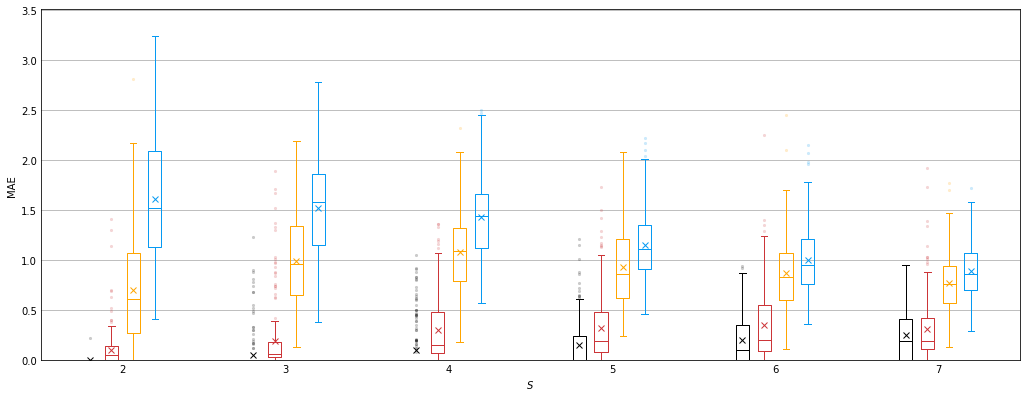

In [149]:
# Joint Boxplot, grouped
fig = figure( figsize=(17,6.5) ); ax  = fig.add_subplot(111)
idx=0
for dft in dfts:
    dftt = dft
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, 4)
    idx+=1
# adjust axis to larger values of guessing and worst case scenario
ax.set_ylim([0,3.51])
ax.set_yticks(np.arange(0,3.51,0.5))

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-best-case.tex'.format(var)]), strict=True, wrap=False)

# Variance Analysis

In [129]:
# Manipulate Data
dft = df.copy()
dft = dft[dft["reflect-order"]==3]
dft = dft[dft["T60"]==0.3]
dft = dft[dft["em"]==10]
dft = dft[dft["wd"]==1.2]
dft = dft[dft["md"]==0.5]
dft = dft[dft["SNR"]==0]
dft = dft[dft["description"]=='var-fixed']
print_summary(dft)

DATA FROM:  {'var-fixed'}
n-sources          2    3    4    5    6    7
n               2400 2400 2400 2400 2400 2400
em-iterations     10   10   10   10   10   10
T60             0.30 0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3    3
var-fixed       0.50 0.50 0.50 0.50 0.50 0.50
var-val         1.93 1.93 1.93 1.93 1.93 1.93
err-mean        0.10 0.17 0.22 0.23 0.26 0.26
percent-matched 0.80 0.74 0.66 0.63 0.56 0.53
NOTE: Data contains range of var-fixed (['0.0', '1.0'], n=1200)
NOTE: Data contains range of var-val (['0.1', '0.5', '1.0', '2.0', '3.0', '5.0'], n=400)



In [130]:
# Sample Sizes
dfp = dft.pivot_table("x1", index=["n-sources"], columns=["var-val","var-fixed"], aggfunc='count').transpose()
print(dfp)
init_vars = set([x[0] for x in dfp.index.values])
var_fixed = set([x[1] for x in dfp.index.values])

n-sources            2    3    4    5    6    7
var-val var-fixed                              
0.10    0          200  200  200  200  200  200
        1          200  200  200  200  200  200
0.50    0          200  200  200  200  200  200
        1          200  200  200  200  200  200
1       0          200  200  200  200  200  200
        1          200  200  200  200  200  200
2       0          200  200  200  200  200  200
        1          200  200  200  200  200  200
3       0          200  200  200  200  200  200
        1          200  200  200  200  200  200
5       0          200  200  200  200  200  200
        1          200  200  200  200  200  200


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


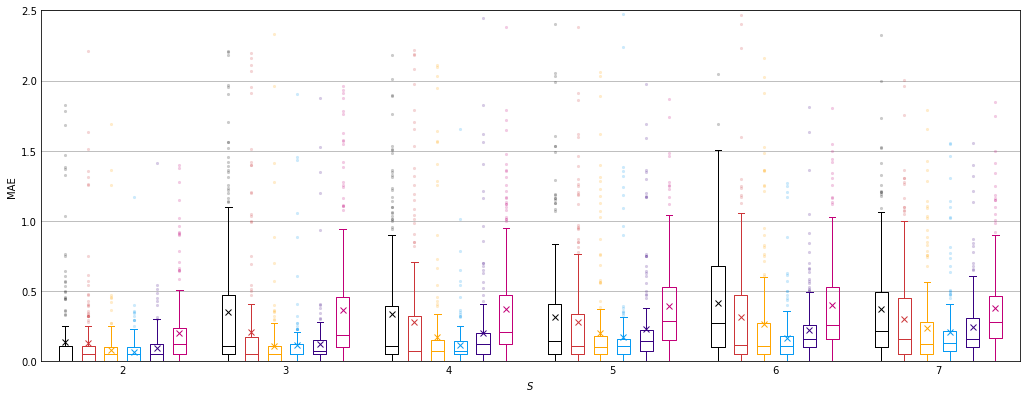

In [131]:
var = 'var-val'
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
fig = figure( figsize=(17,6.5) ); ax  = fig.add_subplot(111)

idx=0
for val in sorted(init_vars):
    dftt = dft[dft[var]==val]
    dftt = dftt[dftt['var-fixed']==1]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(init_vars))
    idx+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}.tex'.format(var)]), strict=True, wrap=False)

In [132]:
dftt = dft[dft['var-fixed']==0]
dfp = dftt.pivot_table("err-mean", columns='n-sources', aggfunc='mean')
print(dfp)

n-sources    2    3    4    5    6    7
err-mean  0.09 0.12 0.19 0.20 0.22 0.23


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


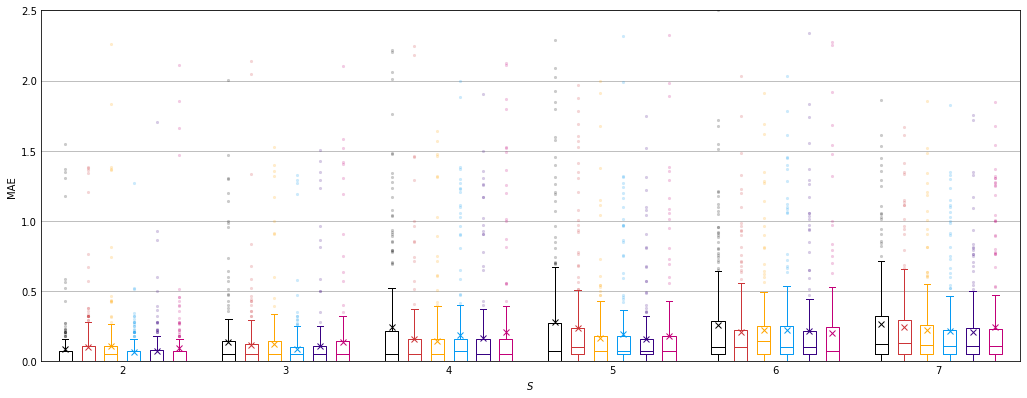

In [133]:
var = 'var-val'
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()

# Joint Boxplot, grouped
fig = figure( figsize=(17,6.5) ); ax  = fig.add_subplot(111)

idx=0
for val in [0.1, 0.5,1,2,3,5]:
    dftt = dft[dft[var]==val]
    dftt = dftt[dftt['var-fixed']==0]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, len(init_vars))
    idx+=1
if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-{}-est.tex'.format(var)]), strict=True, wrap=False)

## Comparison of Schwartz2014 and my implementation

In [14]:
dft = matlab2pandas(dirname='psi_s', save_to=path.join(PATH_ROOT, '_psi_s'), summary=True)

DATA FROM:  {'psi_s'}
n-sources          2    3    4    5    6
n                400  400  400  400  400
em-iterations      5    5    5    5    5
T60             0.30 0.30 0.30 0.30 0.30
SNR                0    0    0    0    0
md              0.50 0.50 0.50 0.50 0.50
reflect-order      3    3    3    3    3
var-fixed          0    0    0    0    0
var-val         0.10 0.10 0.10 0.10 0.10
err-mean        0.17 0.30 0.39 0.42 0.42
percent-matched 0.75 0.67 0.60 0.53 0.48



In [15]:
print("SAMPLE SIZE:")
dfp = dft.pivot_table("x1", index=["n-sources"], columns=[var], aggfunc='count').transpose()
print(dfp)

print("\nMEAN ERROR:")
dfp = dft.pivot_table("err-mean", index=["n-sources"], columns=var, aggfunc='mean').transpose()
print(dfp)

SAMPLE SIZE:
n-sources    2    3    4    5    6
prior                             
1          200  200  200  200  200
2          200  200  200  200  200

MEAN ERROR:
n-sources    2    3    4    5    6
prior                             
1         0.18 0.28 0.37 0.43 0.45
2         0.17 0.32 0.41 0.41 0.39


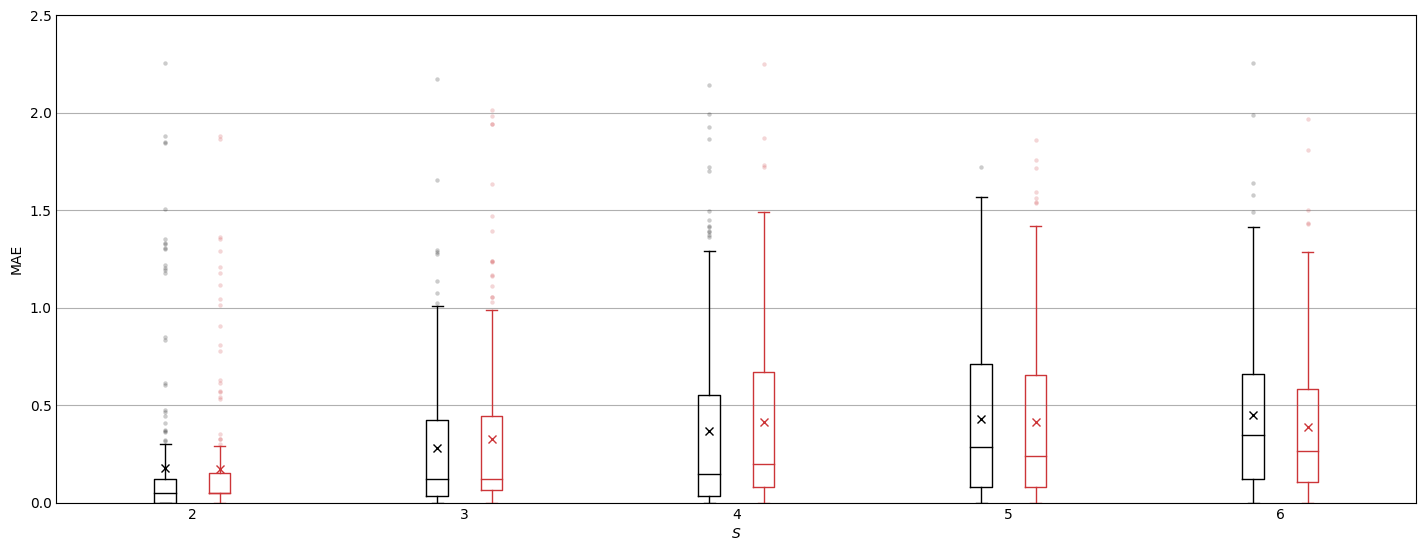

In [17]:
var = 'prior'
# 1 = 'equal', 2 = 'random', 3 = 'half-horizontal', 4 = 'half-vertical' 
# Joint Boxplot, grouped
fig = figure(figsize=(17,6.5)); ax  = fig.add_subplot(111)

idx=0
for val in [1,2]:
    dftt = dft[dft[var]==val]
    bp = dftt.boxplot("err-mean", by=["n-sources"], ax=ax, **boxplot_args)
    style_boxplot(bp, None, idx, 2)
    idx+=1

if EXPORT_LATEX:
    tikz_save("".join([PATH_LATEX_PLOTS, 'boxplot-joined-psips-{}.tex'.format(var)]), strict=True, wrap=False)

# Analyse DataFrame

### Examine Outliers

In [ ]:
# print(pd.concat([df[df["err-mean"]>=1.5].loc[:, "err1":"err7"], df[df["err-mean"]>=1.5].loc[:, "x1":"x7"]], axis=1))
print("ERRORS:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "err1":"err7"]))
print("X-COORDINATES:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "x1":"x7est"]))
print("Y-COORDINATES:\n{}\n".format(dft[dft["err-mean"]>=1.5].loc[:, "y1":"y7est"]))

In [ ]:
# Box Plot
bp = df.boxplot('err-mean', by=["n-sources", "refl-ord"], return_type='both',figsize=(17,  12), showmeans=True, meanline=True)
style_boxplot(bp,None,0,1)

# if EXPORT_LATEX:
#     tikz_save(PATH_BOX_PLOT, show_info=False)

# Perfect Match Analysis

In [ ]:
dfcp = df.pivot_table("percent-matched", columns="refl-ord", aggfunc='mean').transpose()
dfcp.plot(**DEFAULT_LINE_PLOT_ARGS)
# Style plot
style_line_plot(xlabel="number of sources", ylabel="perfect matches", grid="y")